#**SALES PREDICTION USING PYTHON**

The objective of this project is to build a machine learning model that predicts product sales based on advertising expenditure across different marketing channels such as TV, radio, and newspaper.

By analyzing historical advertising data, the model aims to identify the relationship between advertising spend and sales, enabling businesses to make data-driven decisions on budget allocation and optimize marketing strategies to maximize sales performance.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Dataset Source: https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [66]:
from google.colab import files
files.upload_file('sales_predictions.csv')

Saved sales_predictions.csv to /content/sales_predictions.csv


In [67]:
df = pd.read_csv('sales_predictions.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [70]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [71]:
df.duplicated().sum()

np.int64(0)

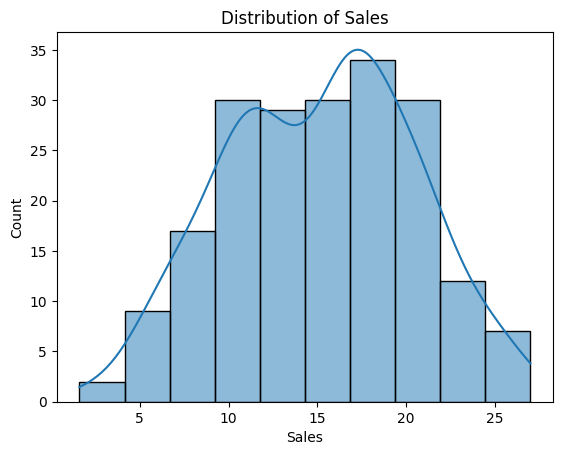

In [72]:
import seaborn as sns
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.show()

Sales values are fairly evenly distributed with a near-normal pattern and no extreme skewness, making them appropriate for regression analysis.

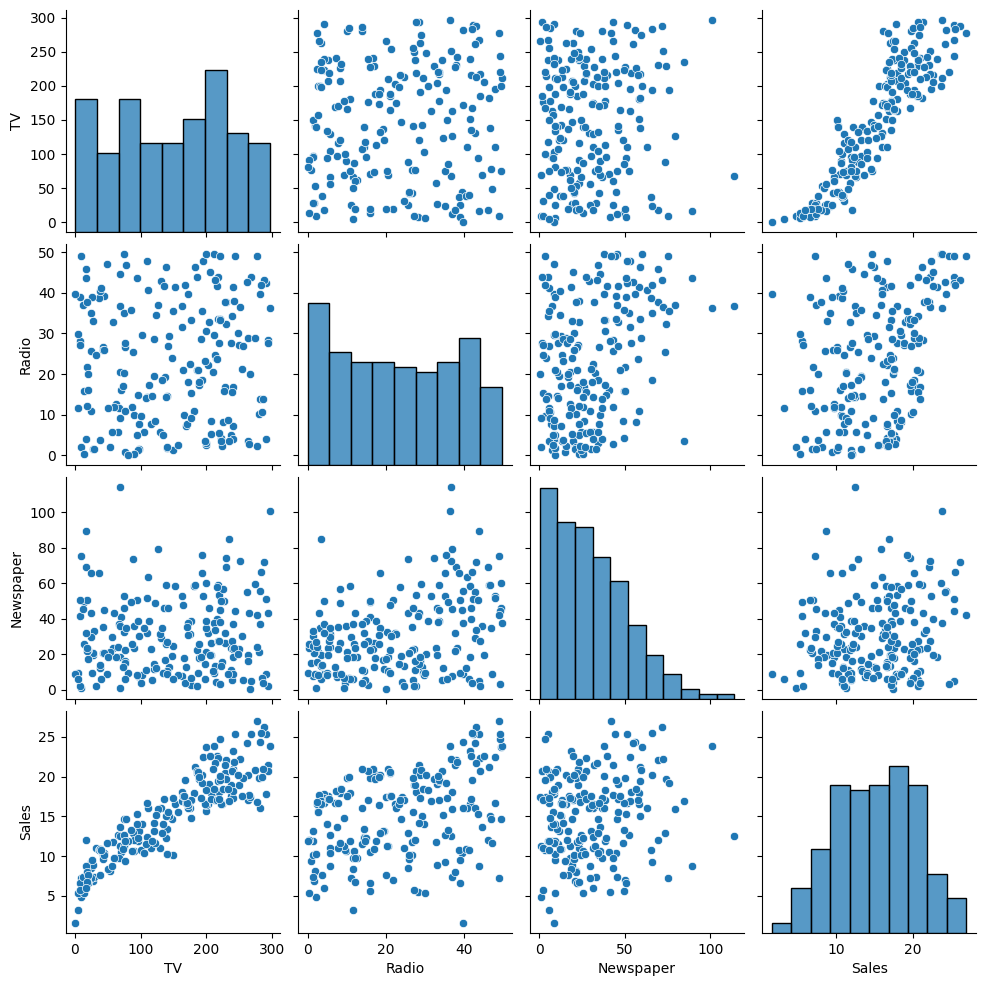

In [73]:
sns.pairplot(df)

## Pair Plot Analysis

The pair plot is used to understand both the **distribution of individual variables** and the **relationships between features and the target variable (`Sales`)**.

### 🔹 Univariate Analysis (Diagonal)
- **TV** and **Radio** advertising budgets are fairly evenly distributed across their ranges.
- **Newspaper** spending is right-skewed, with most observations concentrated at lower values.
- **Sales** follows an approximately normal distribution, making it suitable for regression modeling.

### 🔹 Bivariate Analysis (Off-Diagonal)
- **TV vs Sales** shows a **strong positive linear relationship**, indicating that increased TV advertising spend significantly increases sales.
- **Radio vs Sales** exhibits a **moderate positive relationship**, suggesting a meaningful but weaker impact compared to TV.
- **Newspaper vs Sales** does not display a clear pattern, indicating a **weak or negligible influence** on sales.

### 🔹 Feature–Feature Relationships
- No strong correlations are observed among **TV**, **Radio**, and **Newspaper**.
- This indicates **low multicollinearity**, which is beneficial for linear regression models.

### 🔹 Key Insights
- **TV advertising** is the most influential predictor of sales.
- **Radio advertising** has a secondary but important effect.
- **Newspaper advertising** contributes minimally and may be excluded from the final model.

### Conclusion
The pair plot analysis suggests that **TV and Radio** are strong predictors for sales, while **Newspaper** has limited predictive power. These insights guide effective feature selection for building a linear regression model.


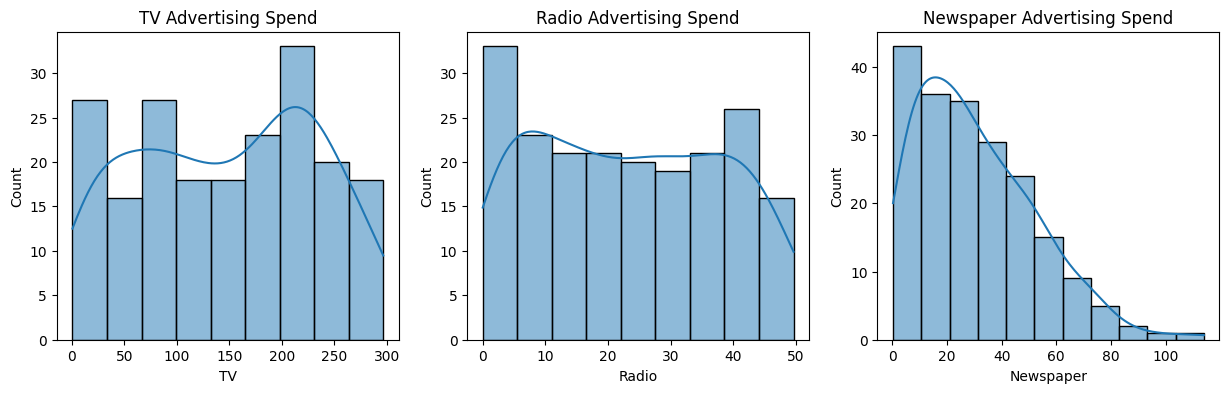

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['TV'], kde=True, ax=axes[0])
sns.histplot(df['Radio'], kde=True, ax=axes[1])
sns.histplot(df['Newspaper'], kde=True, ax=axes[2])

axes[0].set_title("TV Advertising Spend")
axes[1].set_title("Radio Advertising Spend")
axes[2].set_title("Newspaper Advertising Spend")

plt.show()


TV advertising shows the widest range of spending, Radio has a moderate and balanced distribution, while Newspaper spend is right-skewed with higher concentration at lower values.

<Axes: >

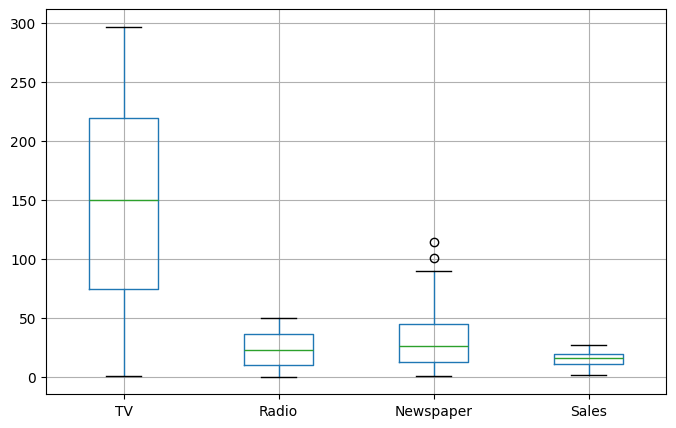

In [75]:
df.boxplot(figsize=(8,5))

TV spend varies the most, Newspaper shows a few outliers, and Sales remains comparatively stable.

**Model Building**

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sales', axis=1), df['Sales'], test_size=0.2, random_state=12)

In [78]:
lr = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best R² Score:", grid_lr.best_score_)
print("Best Parameters:", grid_lr.best_params_)


Best R² Score: 0.8813728386983056
Best Parameters: {'fit_intercept': True, 'positive': False}


In [79]:
lr_model = grid_lr.best_estimator_
lr_model.fit(X_train, y_train)

LinearRegression()

In [80]:
lr_model.score(X_train, y_train)

0.8920677607568788

In [86]:
y_predict = lr_model.predict(X_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


R² Score: 0.930
MSE: 2.416
RMSE: 1.554


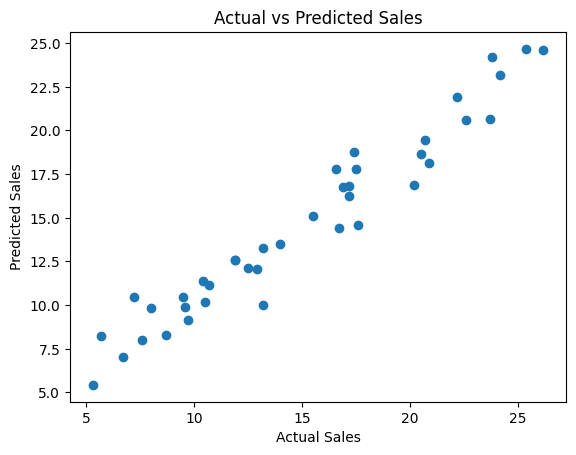

In [88]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


The scatter plot shows predicted sales closely aligned with actual sales values, demonstrating strong predictive accuracy and a good model fit.

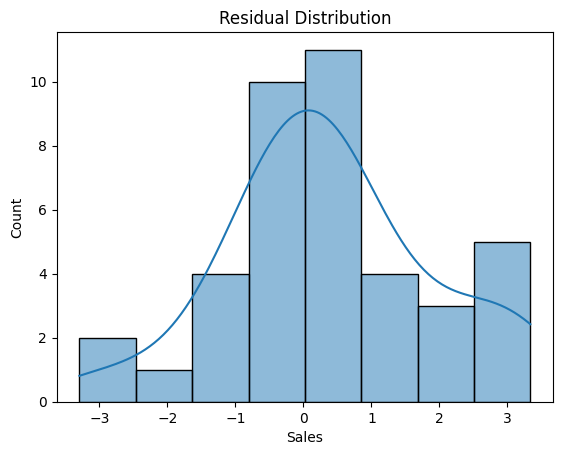

In [89]:
residuals = y_test - y_predict

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

The residuals are approximately normally distributed and centered around zero, indicating that the model does not exhibit systematic bias and satisfies the normality assumption of linear regression.

In [97]:
#dumping model
import pickle
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)